In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

# Circle Classification

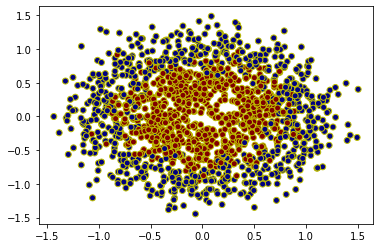

In [3]:
from sklearn.datasets import make_circles

features, labels = make_circles(n_samples=2000, noise=0.2, factor=0.5, random_state=1)

train_x = features[:1600]
train_y = labels[:1600]
test_x = features[1600:]
test_y = labels[1600:]

plt.scatter(train_x[:, 0], train_x[:, 1], c=train_y, cmap='jet', edgecolors="y")

### 1) Neural Network W/O Activation
We define our model with one input layer of eight neurons and output layer of one neuron.
For metrics we will consider `accuracy` and `BinaryCrossentropy`.


In [4]:

model = keras.Sequential([
    keras.layers.Dense(8, activation=None),
    keras.layers.Dense(1, activation=None)
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[
                'accuracy',
                'BinaryCrossentropy'
              ]
            )

In [5]:
model.fit(train_x, train_y, epochs=10, batch_size=32)

Epoch 1/10
50/50 [==============================] - 0s 590us/step - loss: 3.2522 - accuracy: 0.5069 - binary_crossentropy: 3.2522
Epoch 2/10
50/50 [==============================] - 0s 569us/step - loss: 1.2065 - accuracy: 0.5069 - binary_crossentropy: 1.2065
Epoch 3/10
50/50 [==============================] - 0s 610us/step - loss: 0.9776 - accuracy: 0.5069 - binary_crossentropy: 0.9776
Epoch 4/10
50/50 [==============================] - 0s 570us/step - loss: 0.9084 - accuracy: 0.5069 - binary_crossentropy: 0.9084
Epoch 5/10
50/50 [==============================] - 0s 610us/step - loss: 0.8578 - accuracy: 0.5069 - binary_crossentropy: 0.8578
Epoch 6/10
50/50 [==============================] - 0s 590us/step - loss: 0.8185 - accuracy: 0.5069 - binary_crossentropy: 0.8185
Epoch 7/10
50/50 [==============================] - 0s 671us/step - loss: 0.7873 - accuracy: 0.5069 - binary_crossentropy: 0.7873
Epoch 8/10
50/50 [==============================] - 0s 610us/step - loss: 0.7627 - accurac

With an accuracy of 0.5069 it's safe to say we are not classifying anything, we're just flipping a coin. The reason is because we have not used any activation function and what we have is closer to a linear regression model. So in order to have our non-linear transformation on input we need to use activation functions.

### 2) Neural Network W/ Activation

In [6]:
model = keras.Sequential([
    keras.layers.Dense(8, activation='linear'),
    keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[
                'accuracy',
                'BinaryCrossentropy'
              ]
            )

In [7]:
model.fit(train_x, train_y, epochs=10, batch_size=32)

Epoch 1/10
50/50 [==============================] - 0s 590us/step - loss: 4.3260 - accuracy: 0.4175 - binary_crossentropy: 4.3260
Epoch 2/10
50/50 [==============================] - 0s 570us/step - loss: 3.9534 - accuracy: 0.4162 - binary_crossentropy: 3.9534
Epoch 3/10
50/50 [==============================] - 0s 610us/step - loss: 3.1436 - accuracy: 0.4338 - binary_crossentropy: 3.1436
Epoch 4/10
50/50 [==============================] - 0s 549us/step - loss: 1.4348 - accuracy: 0.4737 - binary_crossentropy: 1.4348
Epoch 5/10
50/50 [==============================] - 0s 610us/step - loss: 0.8998 - accuracy: 0.5019 - binary_crossentropy: 0.8998
Epoch 6/10
50/50 [==============================] - 0s 549us/step - loss: 0.8636 - accuracy: 0.5038 - binary_crossentropy: 0.8636
Epoch 7/10
50/50 [==============================] - 0s 651us/step - loss: 0.8383 - accuracy: 0.5031 - binary_crossentropy: 0.8383
Epoch 8/10
50/50 [==============================] - 0s 631us/step - loss: 0.8174 - accurac

As expected we don't see an improvement because we still have a linear model which cannot make connection between non-linear and complex features that we have.

### 3) Neural Network W/ Regression Loss
This time we use Relu and Sigmoid activation functions which are regularly used for this type of classification but with Mean Squared Error which is usually used for regression problems.

In [8]:
model = keras.Sequential([
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[
                'accuracy',
                'MeanSquaredError'
              ]
            )

In [9]:
model.fit(train_x, train_y, epochs=10, batch_size=32)

Epoch 1/10
50/50 [==============================] - 0s 565us/step - loss: 0.2399 - accuracy: 0.5206 - mean_squared_error: 0.2399
Epoch 2/10
50/50 [==============================] - 0s 549us/step - loss: 0.2375 - accuracy: 0.5669 - mean_squared_error: 0.2375
Epoch 3/10
50/50 [==============================] - 0s 570us/step - loss: 0.2351 - accuracy: 0.5931 - mean_squared_error: 0.2351
Epoch 4/10
50/50 [==============================] - 0s 569us/step - loss: 0.2325 - accuracy: 0.6219 - mean_squared_error: 0.2325
Epoch 5/10
50/50 [==============================] - 0s 651us/step - loss: 0.2296 - accuracy: 0.6338 - mean_squared_error: 0.2296
Epoch 6/10
50/50 [==============================] - 0s 569us/step - loss: 0.2266 - accuracy: 0.6569 - mean_squared_error: 0.2266
Epoch 7/10
50/50 [==============================] - 0s 590us/step - loss: 0.2242 - accuracy: 0.6687 - mean_squared_error: 0.2242
Epoch 8/10
50/50 [==============================] - 0s 549us/step - loss: 0.2221 - accuracy: 0.67

As we can see we reach an accuracy of 0.6913 which is higher but still not satisfactory. The reason is our choice of loss function. 

### 4) Neural Network W/ More Input Layer Neurons


So far our models only include 8 neurons in their input layers, here we increase the number of neurons for better depiction of input data.

In [10]:
model = keras.Sequential([
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[
                'accuracy',
                'BinaryCrossentropy'
              ]
            )

model.fit(train_x, train_y, epochs=10, batch_size=32)

Epoch 1/10
50/50 [==============================] - 0s 549us/step - loss: 0.6920 - accuracy: 0.5213 - binary_crossentropy: 0.6920
Epoch 2/10
50/50 [==============================] - 0s 570us/step - loss: 0.6763 - accuracy: 0.5106 - binary_crossentropy: 0.6763
Epoch 3/10
50/50 [==============================] - 0s 651us/step - loss: 0.6634 - accuracy: 0.5350 - binary_crossentropy: 0.6634
Epoch 4/10
50/50 [==============================] - 0s 610us/step - loss: 0.6513 - accuracy: 0.5875 - binary_crossentropy: 0.6513
Epoch 5/10
50/50 [==============================] - 0s 631us/step - loss: 0.6394 - accuracy: 0.6225 - binary_crossentropy: 0.6394
Epoch 6/10
50/50 [==============================] - 0s 671us/step - loss: 0.6270 - accuracy: 0.6525 - binary_crossentropy: 0.6270
Epoch 7/10
50/50 [==============================] - 0s 631us/step - loss: 0.6137 - accuracy: 0.7031 - binary_crossentropy: 0.6137
Epoch 8/10
50/50 [==============================] - 0s 692us/step - loss: 0.6003 - accurac

Just with this simple change we have improved accuracy by about 9 percent. We can still do better...

### 5) Choosing Optimum Learning Ratio

In [11]:
a = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]

for i in range(7):
  model = keras.Sequential([
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=a[i]),
                loss='binary_crossentropy',
                metrics=[
                  'accuracy',
                  'BinaryCrossentropy'
                ]
              )

  record = model.fit(train_x, train_y, epochs=10, batch_size=32, verbose=0)

  print('Learning Ratio: {}'.format(a[i]))
  print('Loss: {} | Accuracy: {}'.format(record.history['loss'][-1], record.history['accuracy'][-1]))
  print()

Learning Ratio: 1e-06
Loss: 0.6943193674087524 | Accuracy: 0.5106250047683716

Learning Ratio: 1e-05
Loss: 0.7047748565673828 | Accuracy: 0.5

Learning Ratio: 0.0001
Loss: 0.6552176475524902 | Accuracy: 0.5718749761581421

Learning Ratio: 0.001
Loss: 0.5849229097366333 | Accuracy: 0.7975000143051147

Learning Ratio: 0.01
Loss: 0.27659735083580017 | Accuracy: 0.8868749737739563

Learning Ratio: 0.1
Loss: 0.2844165861606598 | Accuracy: 0.8849999904632568

Learning Ratio: 1
Loss: 0.5013997554779053 | Accuracy: 0.7862499952316284



Best accuracy can be seen with a learning ratio of 0.01 which means with lower learning ratios we have to wait a long time for model to train and we still don't have the highest accuracy within these epochs, and with higher learning ratios we're jumping over the minimum error and never reaching the optimum accuracy. 

### 7) Proposed Model
In our proposed model we add a hidden layer with 8 neurons to further deepen the learning process. For the first two layers we will use Relu activation function as it is costume with this form of classification. And for the output layer given that we have a binary classification at hand, we use sigmoid activation function and binary cross-entropy. And with a learning rate of 0.01 which we previously measured we have the accuracy of:

In [12]:
model = keras.Sequential([
  keras.layers.Dense(15, activation='relu'),
  keras.layers.Dense(8, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=[
                'accuracy',
                'BinaryCrossentropy'
              ]
            )

model.fit(train_x, train_y, epochs=10, batch_size=32)

Epoch 1/10
50/50 [==============================] - 0s 651us/step - loss: 0.5961 - accuracy: 0.7056 - binary_crossentropy: 0.5961
Epoch 2/10
50/50 [==============================] - 0s 610us/step - loss: 0.3484 - accuracy: 0.8744 - binary_crossentropy: 0.3484
Epoch 3/10
50/50 [==============================] - 0s 570us/step - loss: 0.2815 - accuracy: 0.8800 - binary_crossentropy: 0.2815
Epoch 4/10
50/50 [==============================] - 0s 610us/step - loss: 0.2867 - accuracy: 0.8819 - binary_crossentropy: 0.2867
Epoch 5/10
50/50 [==============================] - 0s 590us/step - loss: 0.2766 - accuracy: 0.8769 - binary_crossentropy: 0.2766
Epoch 6/10
50/50 [==============================] - 0s 630us/step - loss: 0.2738 - accuracy: 0.8844 - binary_crossentropy: 0.2738
Epoch 7/10
50/50 [==============================] - 0s 610us/step - loss: 0.2704 - accuracy: 0.8831 - binary_crossentropy: 0.2704
Epoch 8/10
50/50 [==============================] - 0s 610us/step - loss: 0.2692 - accurac

In [13]:
model.evaluate(test_x, test_y, batch_size=32)

13/13 [==============================] - 0s 582us/step - loss: 0.2891 - accuracy: 0.8775 - binary_crossentropy: 0.2891


[0.2891138792037964, 0.8774999976158142, 0.2891138792037964]

# Fashion
We use the the above techniques to train a model on `fashion_mnist` dataset.

In [16]:
fashion_mnist = keras.datasets.fashion_mnist
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 6s 1us/step


In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.fit(train_x, train_y, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3449 - accuracy: 0.8771
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3377 - accuracy: 0.8803
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3312 - accuracy: 0.8828
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3320 - accuracy: 0.8808
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3283 - accuracy: 0.8829
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3184 - accuracy: 0.8864
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3166 - accuracy: 0.8866
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3202 - accuracy: 0.8874
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3208 - accuracy: 0.8868
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.314

In [21]:
model.evaluate(test_x,  test_y, batch_size=32)

313/313 [==============================] - 0s 1ms/step - loss: 0.4284 - accuracy: 0.8676


[0.4284385144710541, 0.8676000237464905]

### Confusion Matrix

In [22]:
predicted_encoded = model.predict(test_x)
predicted = tf.argmax(predicted_encoded, axis=1)

313/313 [==============================] - 0s 894us/step


In [23]:
confusion_matrix = tf.math.confusion_matrix(test_y, predicted).numpy()
pd.DataFrame(confusion_matrix)

,0,1,2,3,4,5,6,7,8,9
0,878,1,8,36,6,1,66,0,4,0
1,2,958,1,34,2,0,1,0,2,0
2,22,1,775,17,123,0,62,0,0,0
3,31,3,5,915,18,0,25,0,3,0
4,1,0,81,62,791,0,63,0,2,0
5,0,0,0,3,0,934,0,38,3,22
6,212,0,95,43,86,0,557,0,7,0
7,0,0,0,0,0,6,0,979,0,15
8,7,1,6,4,4,3,17,4,954,0
9,0,0,0,1,0,3,1,60,0,935
